# EDA
<b>Importing the necessary libraries and dataset<b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import random
random.seed(42)
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import kurtosis
from pmdarima.arima import auto_arima

In [3]:
sales = pd.read_csv('Dataset/train.csv')
sales.Date = pd.to_datetime(sales.Date)
sales.set_index('Date', inplace=True)

In [4]:
stores = pd.read_csv('Dataset/store.csv')

#### Checking the Stores dataset

In [5]:
stores

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


#### Checking first 5 values in the dataset

In [6]:
sales.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [7]:
sales.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

<b> Checking the basic information ( Non Null data and datatype of the data columns ) </b>

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


<b> Shape of the dataset. This shows there are 1017209 data points and 9 columns </b>

In [9]:
sales.shape

(1017209, 8)

<b> Basic Description of sales dataset </b>

In [10]:
sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
# # axis = first_store_open.groupby('Month')[['Sales']].mean()
# sales_open = sales[sales['Open'] == 1]
# fig = px.line(sales_open, x = sales_open.index, y = 'Sales', title = 'Average sales per month', markers = True, color = 'Store')
# fig.show()

# EDA on a specific store ( Store No. 1 )
This is done to get a basic insight of the data as performing on a single is easy compared to whole data

In [12]:
def run_sequence_plot (x, y, title ,  mean_line = False, xlabel="time", ylabel="series"):
    """
    A function that plots a line plot for the given values
    parameters:
        x : Values to be plot in x a-xis
        y : values to plot on y-axis( must be same length to parameter x )
        title : Title  of the plot
        xlabel : Xlabel of the plot
        ylabel: Ylabel of the plot
    returns: y
        Line plot
    """
    plt.figure(figsize =(20 ,20))
    sns.lineplot(x, y,  label = ylabel)
    if(mean_line  == True):
        plt.axhline(y=np.nanmean(y), color = "red", label = f'mean(= {np.nanmean(y):.2f} )')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=45 , rotation_mode='anchor', ha ='right' )
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(alpha=0.3);

<b>Selecting the first store for EDA</b> 

In [13]:
print(random.randint(1, 1555))
first_store = sales[sales['Store'] == 1]
first_store.index= first_store.index.astype('datetime64[ns]')

1310


In [14]:
first_store.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1
2015-07-26,1,7,0,0,0,0,0,0
2015-07-25,1,6,4364,500,1,0,0,0
2015-07-24,1,5,3706,459,1,0,0,0
2015-07-23,1,4,3769,503,1,0,0,0


In [15]:
first_store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Sales          942 non-null    int64 
 3   Customers      942 non-null    int64 
 4   Open           942 non-null    int64 
 5   Promo          942 non-null    int64 
 6   StateHoliday   942 non-null    object
 7   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 66.2+ KB


<b>Selecting the days when the stores are open</b>

In [16]:
first_store_open = first_store[first_store['Open'] == 1 ]
first_store.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1
2015-07-26,1,7,0,0,0,0,0,0
2015-07-25,1,6,4364,500,1,0,0,0
2015-07-24,1,5,3706,459,1,0,0,0
2015-07-23,1,4,3769,503,1,0,0,0


### Run Sequence Plot (All Days)
The graph is difficult for analysis due to the effect of holiday sales/customer count being 0. 

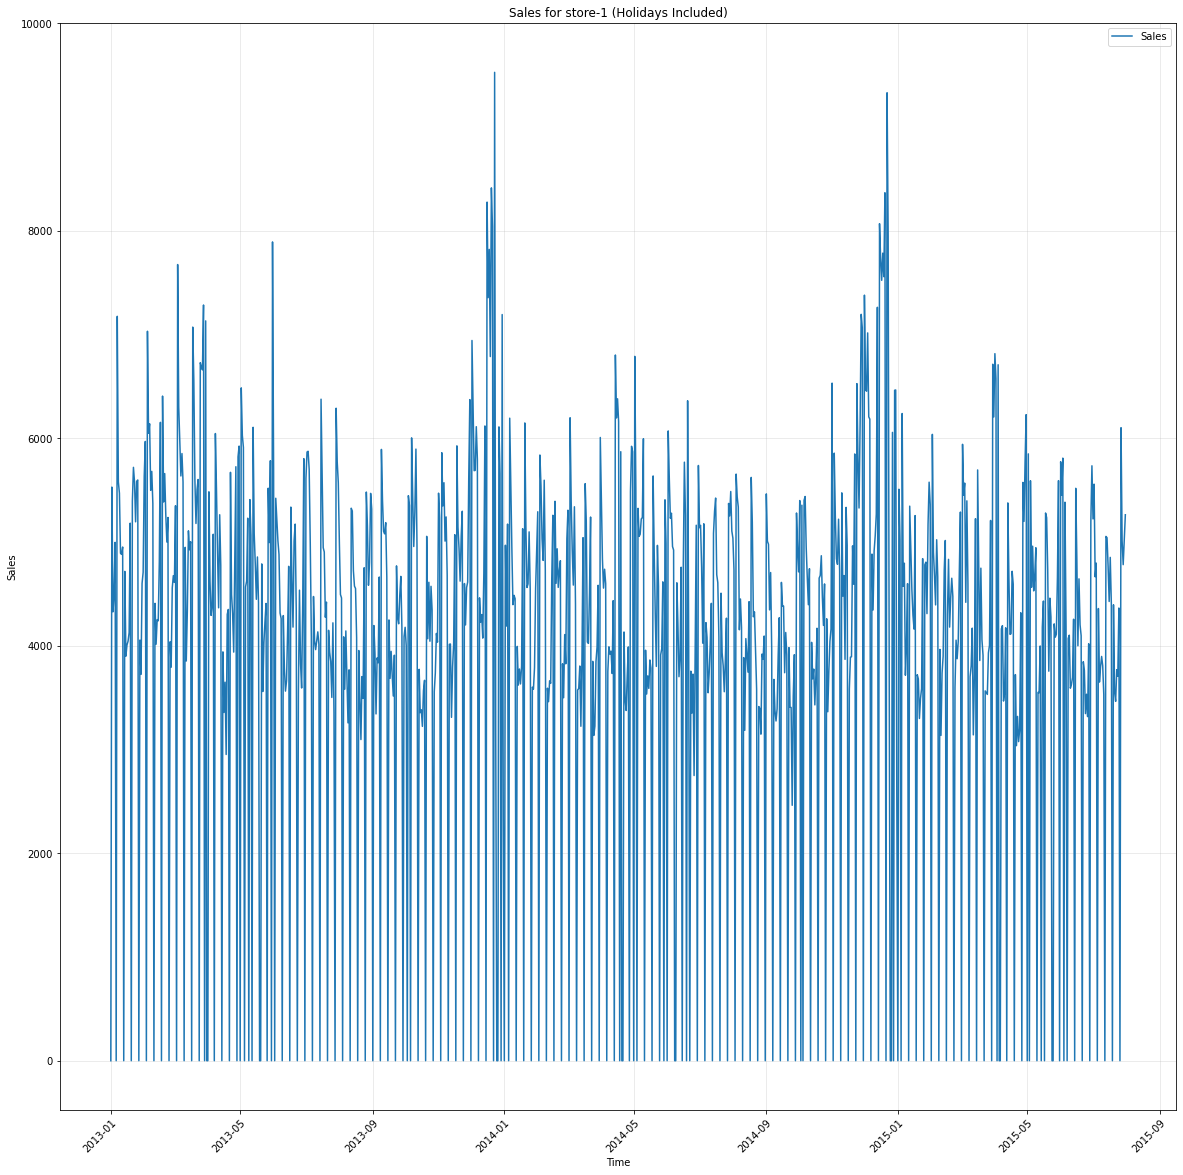

In [17]:
run_sequence_plot(x = first_store.index, 
                  y = first_store['Sales'],
                  title = "Sales for store-1 (Holidays Included)",
                  xlabel = 'Time', ylabel = 'Sales')

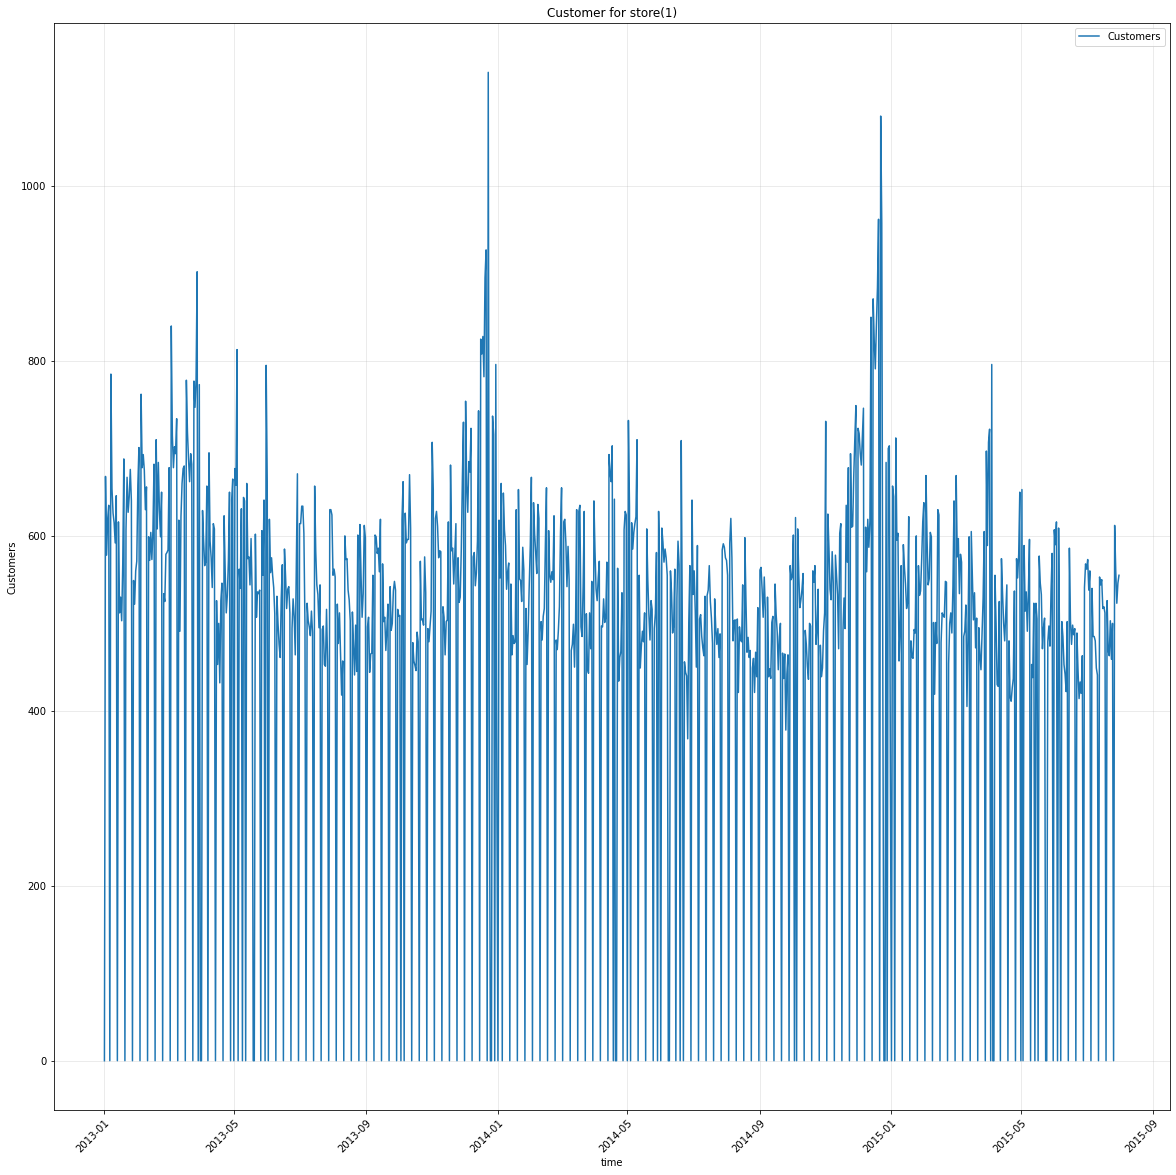

In [18]:
run_sequence_plot(x = first_store.index, 
                  y = first_store['Customers'],
                  title = "Customer for store(1)",
                  ylabel = 'Customers')

###  Run Sequence Plot for open days
Checking for the values in the open days shows a clear pattern in data.

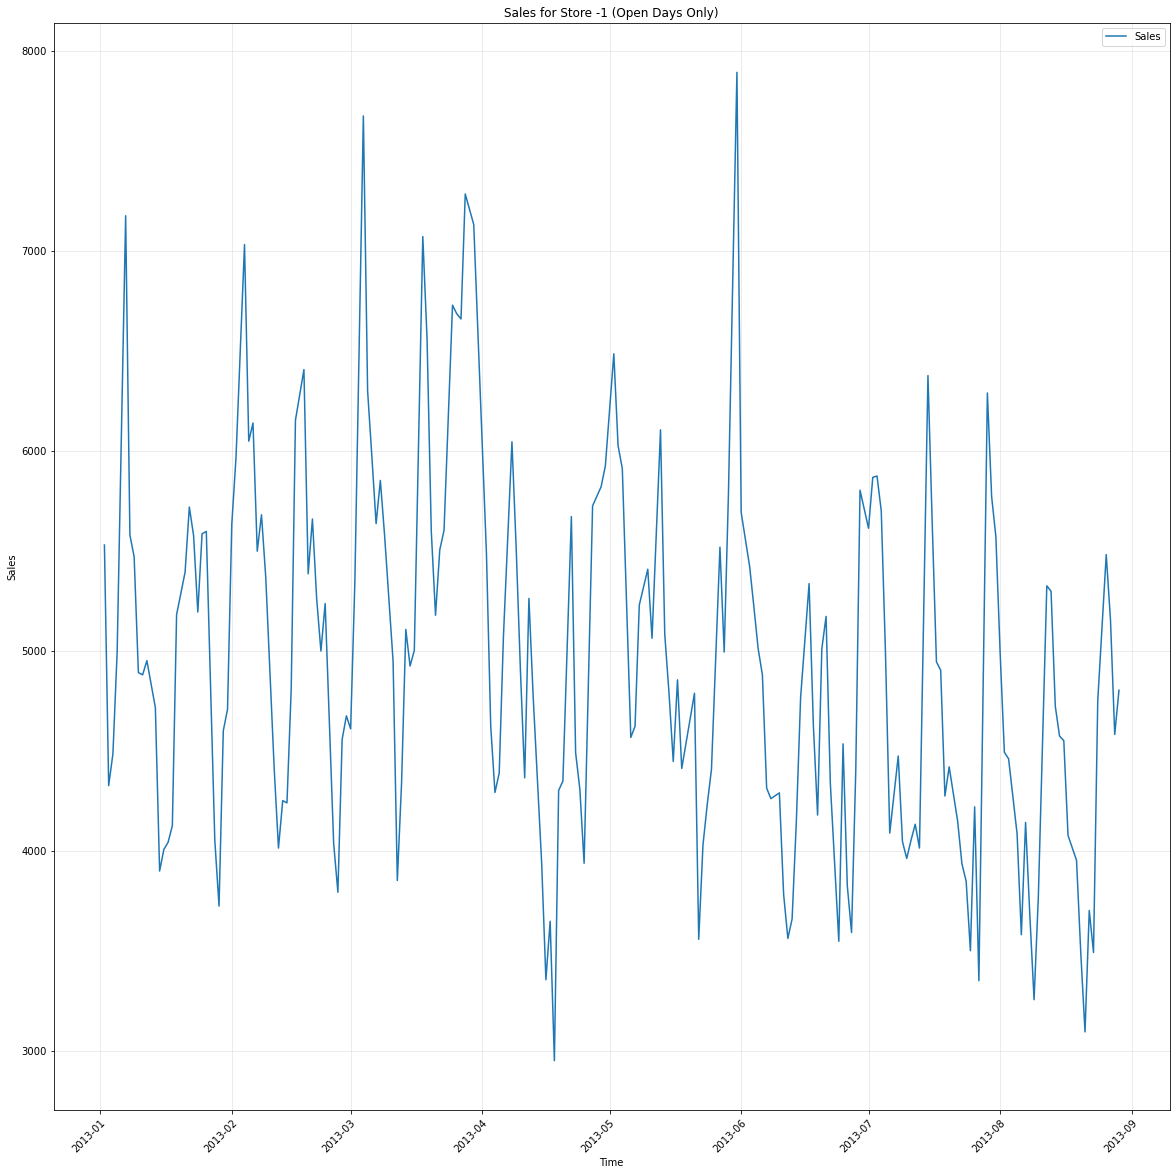

In [19]:
run_sequence_plot(x = first_store_open.index[-200:], 
                  y = first_store_open['Sales'][-200:], 
                  title = "Sales for Store -1 (Open Days Only)", 
                  mean_line = False, xlabel = 'Time', ylabel = 'Sales')

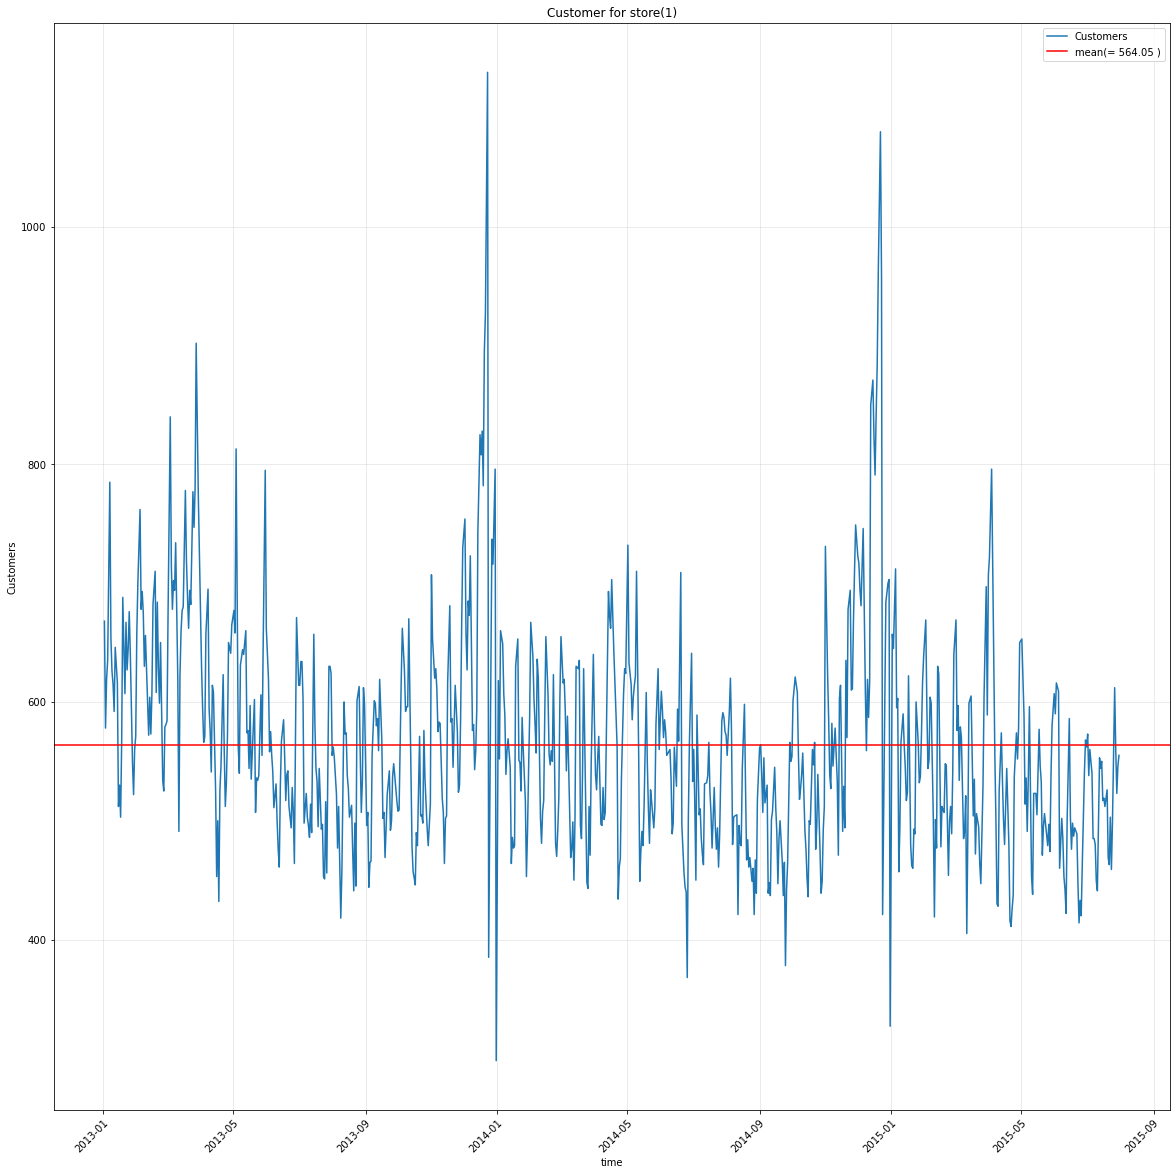

In [20]:
run_sequence_plot(x = first_store_open.index,
                  y = first_store_open['Customers'],
                  title = "Customer for store(1)",
                  mean_line = True,
                  ylabel = 'Customers')

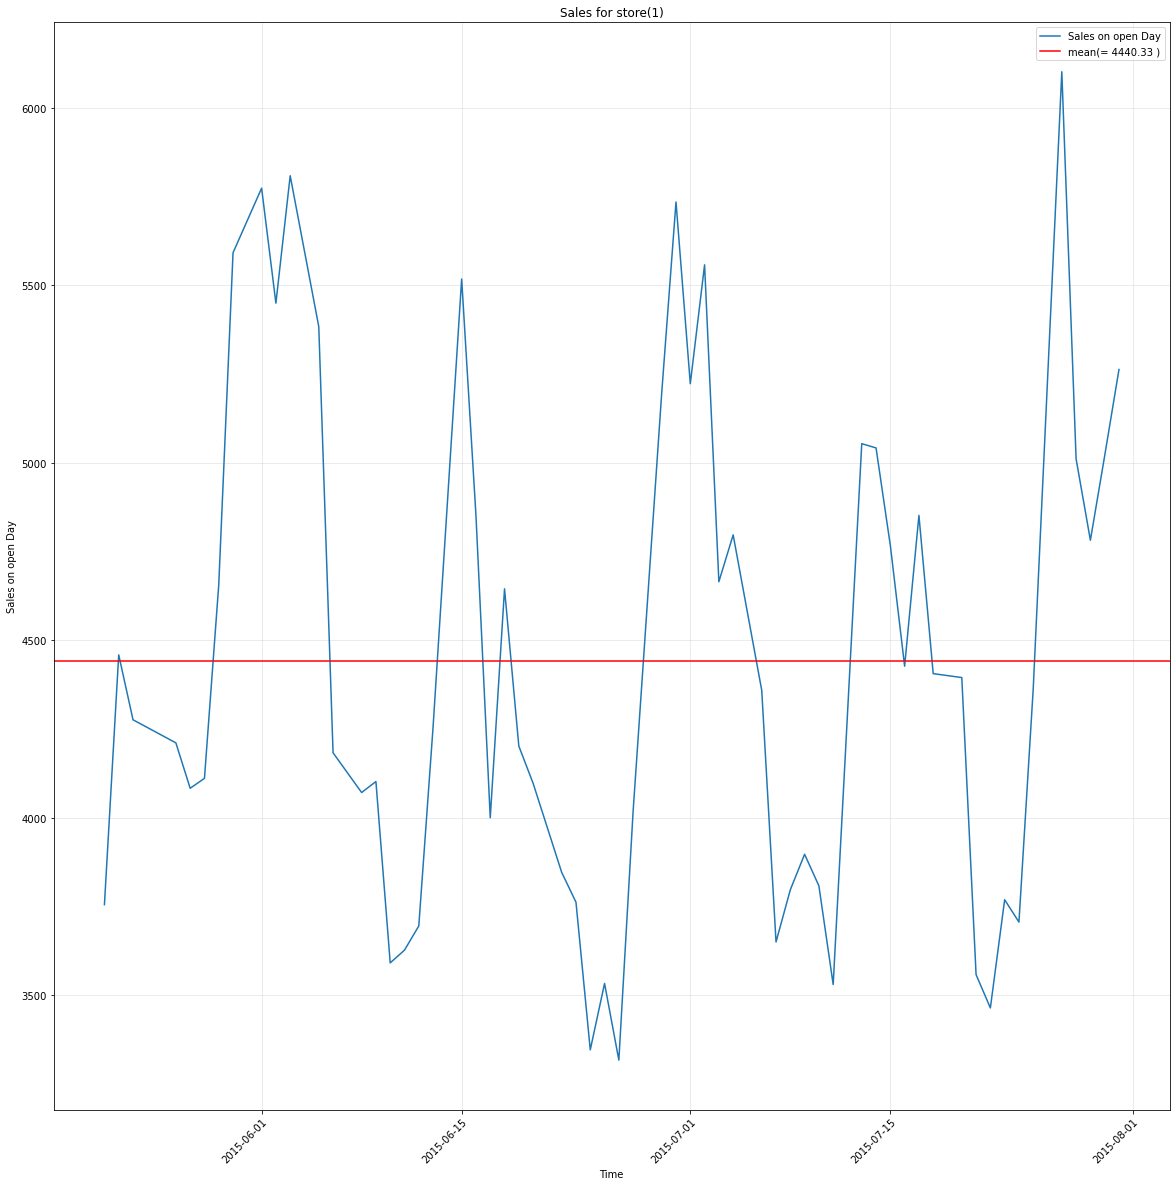

In [21]:
run_sequence_plot(x = first_store_open.index[0:60], 
                  y = first_store_open['Sales'].iloc[0:60], 
                  title = "Sales for store(1)", 
                  mean_line = True, xlabel = 'Time', ylabel = 'Sales on open Day')

Data seems fairly stationary. Validating with the ADF test we get the same result below.

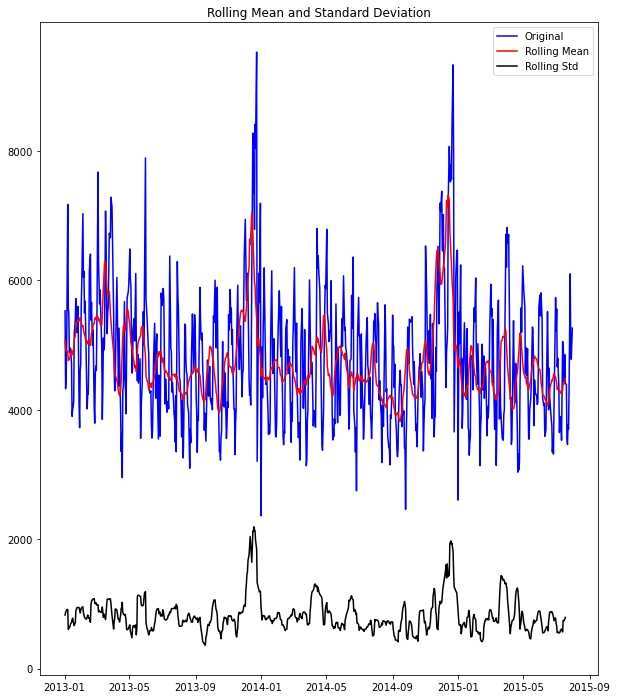

Test Statistics                 -5.412786
p-value                          0.000003
No. of lags used                13.000000
Number of observations used    767.000000
critical value (1%)             -3.438905
critical value (5%)             -2.865316
critical value (10%)            -2.568781
dtype: float64


In [22]:
def check_stationary(df):
  rolling_mean = df.rolling(12).mean()
  rolling_std = df.rolling(12).std()
  #printing the rolling mean and std
  plt.figure(figsize = (10,12))
  plt.plot(df, color='blue',label='Original')
  plt.plot(rolling_mean, color='red', label='Rolling Mean')
  plt.plot(rolling_std, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show()
  # ADF test
  adf = adfuller(df, autolag='AIC')
 # print(adf) # adf, pvalue, usedlags, nobs, critical_values
  output = pd.Series(adf[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
  for key,values in adf[4].items():
        output['critical value (%s)'%key] =  values
  print(output)
check_stationary(first_store_open['Sales'])

### Check Average Monthly Sales 

In [23]:
first_store_open['Month'] = first_store_open.index.month
# first_store_open.index

In [24]:
axis = first_store_open.groupby('Month')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per month', markers = True)
fig.show()

### Check Average Sales based on Day of the week 
In case of STORE 1 : This shows that the sales are high on first and sixth day of the week and is low in fourth day. On the seventh day of the week the store is closed hence there so sales at all.

In [25]:
axis = first_store.groupby('DayOfWeek')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales week day(Holidays included)', markers = True)
fig.show()

In [26]:
axis = first_store_open.groupby('DayOfWeek')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per days of week ( Holidays Excluded )', markers = True)
fig.show()

### Checking the effect of Promo in sales
For STORE 1 : The figure shows there is some effect of Promos in the data

In [27]:
promo_sales = first_store_open.groupby('Promo')[['Sales']].mean().round(2)
fig = px.bar(promo_sales, x= promo_sales.index,y = promo_sales.Sales,
            color = promo_sales.index,  
            width=800, height=600, 
            labels = {'Promo': "Promo", 'value': "Average Sales"}, 
            title = "Effect of Promo in Sales (23% increase)",
            text = 'Sales'
)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1],
        ticktext = ["NO", "YES"]
    )
)
fig.update_coloraxes(showscale=False)
fig.show()

### Checking for effect of school holiday in Sales
We don't seem to have any effect of school holiday in sales

In [28]:
first_store_open['SchoolHoliday'].value_counts()

0    621
1    160
Name: SchoolHoliday, dtype: int64

In [29]:
school_holiday = first_store_open.groupby('SchoolHoliday')[['Sales']].mean().round(2)
fig = px.bar(school_holiday, x= school_holiday.index,y = school_holiday.Sales,
            color = school_holiday.index,  
            width=800, height=600, 
            labels = {'SchoolHoliday': "School Holiday", 'value': "Average Sales"}, 
            title = "Effect of School Holiday in Sales",
            text = 'Sales'
)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1],
        ticktext = ["NO", "YES"]
    )
)
fig.update_coloraxes(showscale=False)
fig.show()

## Heatmap to visualize the correlation of features

Finding the correlation of the features first

In [30]:
first_store[['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']].corr()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
DayOfWeek,1.000000,-0.502143,-0.495904,-0.544070,-0.392929,-0.067935
Sales,-0.502143,1.000000,0.984341,0.889360,0.471333,0.007692
Customers,-0.495904,0.984341,1.000000,0.927965,0.377675,-0.000020
Open,-0.544070,0.889360,0.927965,1.000000,0.299053,-0.000096
Promo,-0.392929,0.471333,0.377675,0.299053,1.000000,0.028374
SchoolHoliday,-0.067935,0.007692,-0.000020,-0.000096,0.028374,1.000000


### Plotting the heatmap
In the figure we can see the sales numbers are highly correlated with the number of customers, Whether the store is open or not and promotions.

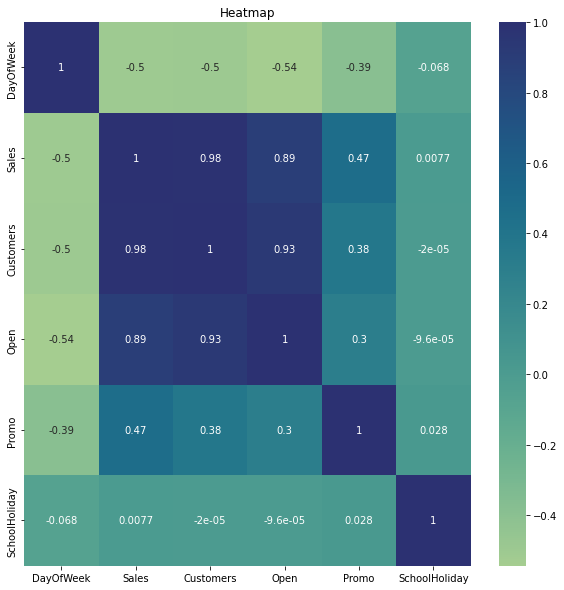

In [31]:
plt.figure(figsize = (10,10))
sns.heatmap(first_store[['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']].corr(), cmap="crest", annot = True)
plt.title("Heatmap")
plt.show()

#### Data understanding using box plot

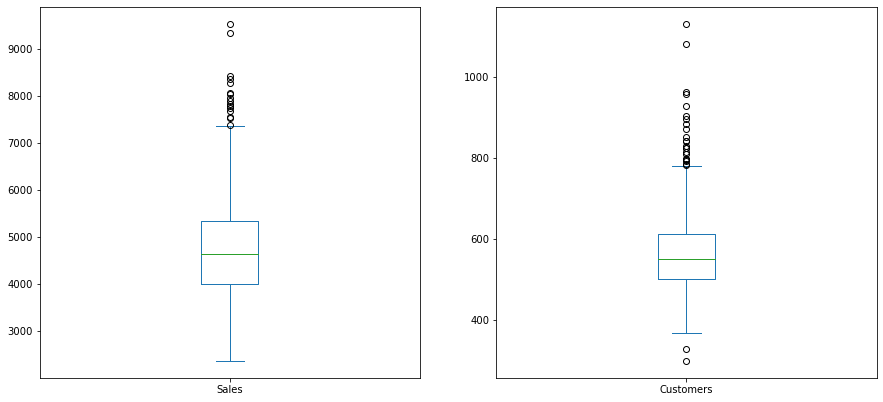

In [32]:
first_store_open.plot(y=['Sales', 'Customers'], 
           kind='box', subplots=True, layout=(2,2), figsize=(15,15))
plt.show()

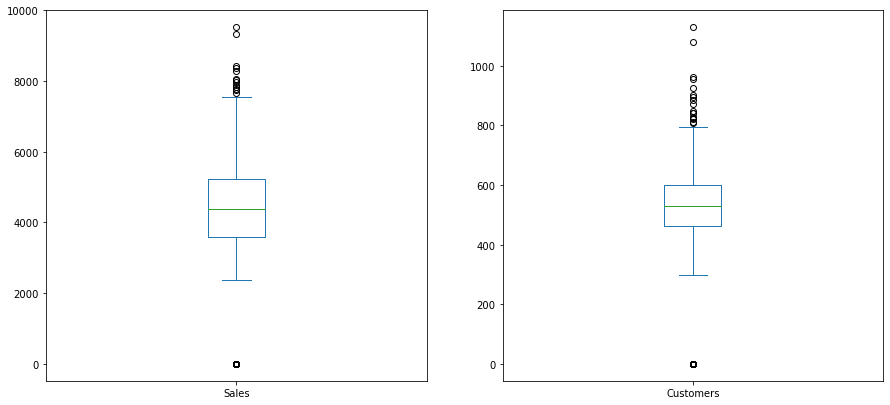

In [33]:
first_store.plot(y=['Sales', 'Customers'], 
           kind='box', subplots=True, layout=(2,2), figsize=(15,15))
plt.show()

#### Checking the density estimation using KDE Plot (For Open Days only)


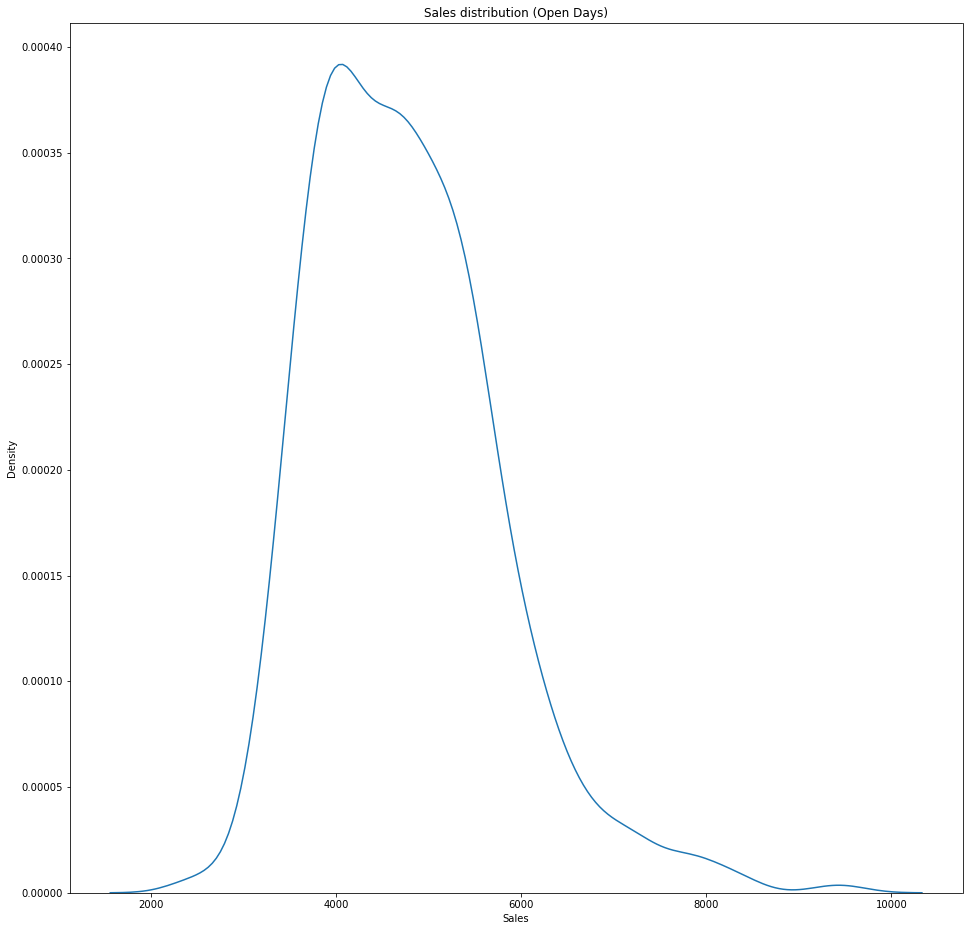

In [34]:
plt.figure(figsize = (16,16))
sns.kdeplot(data=first_store_open,x='Sales')
plt.title("Sales distribution (Open Days)")
plt.show()

In [35]:
print("Statistics for first store sales in open days:")
first_store_open['Sales'].describe()

Statistics for first store sales in open days:


count     781.000000
mean     4759.096031
std      1012.106393
min      2362.000000
25%      4000.000000
50%      4647.000000
75%      5348.000000
max      9528.000000
Name: Sales, dtype: float64

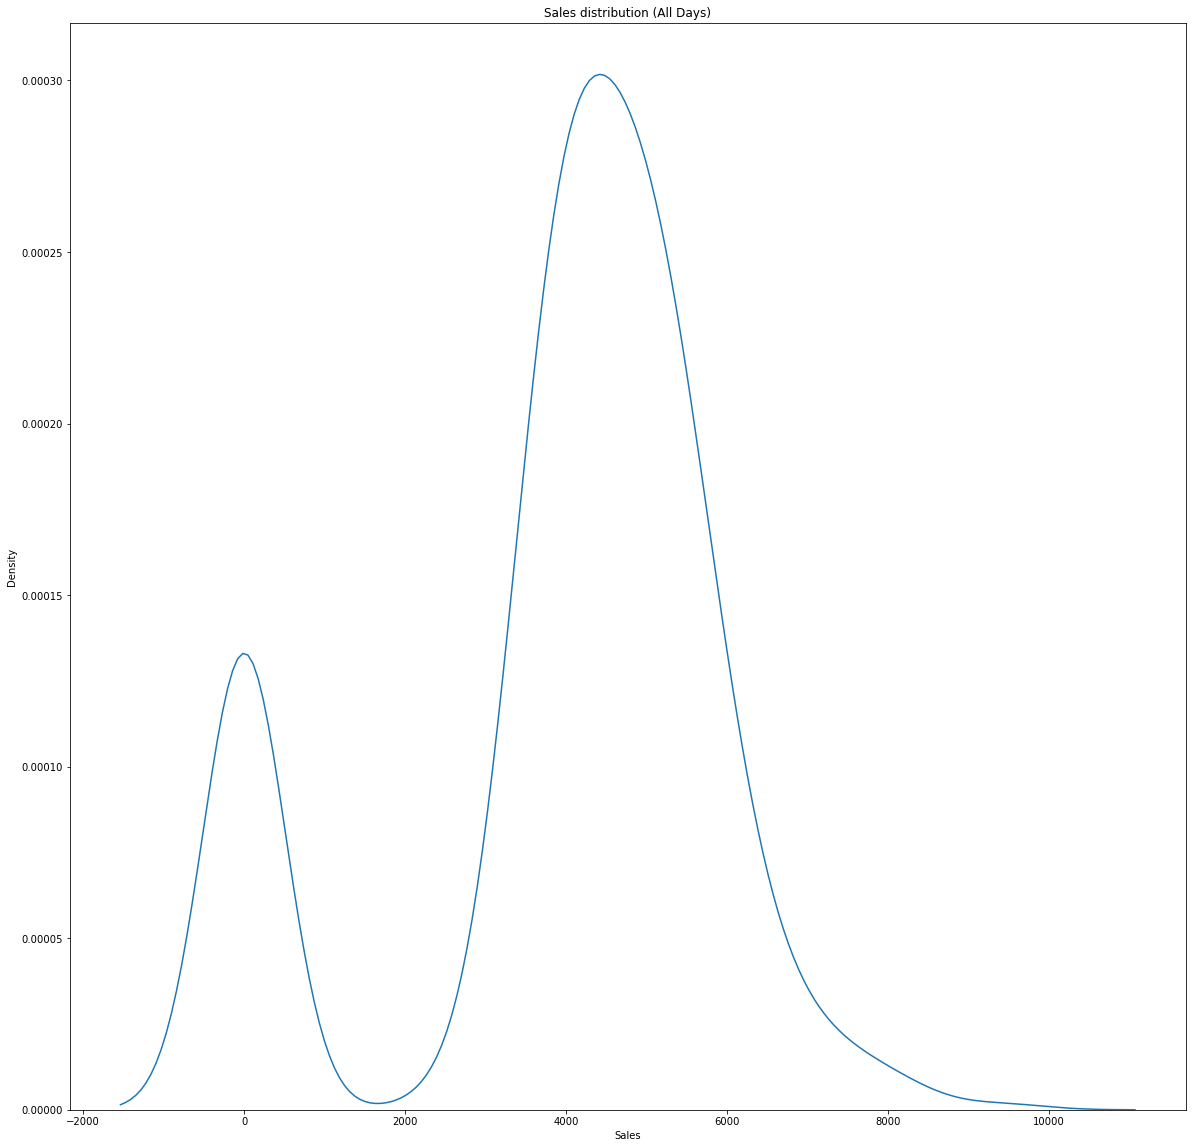

In [36]:
plt.figure(figsize = (20,20))
sns.kdeplot(data=first_store,x='Sales')
plt.title("Sales distribution (All Days)")
plt.show()

In [37]:
first_store['Sales'].describe()

count     942.000000
mean     3945.704883
std      2015.417840
min         0.000000
25%      3588.250000
50%      4373.500000
75%      5220.000000
max      9528.000000
Name: Sales, dtype: float64

In [38]:
first_store.min()

Store            1
DayOfWeek        1
Sales            0
Customers        0
Open             0
Promo            0
SchoolHoliday    0
dtype: int64

#### PairPlot

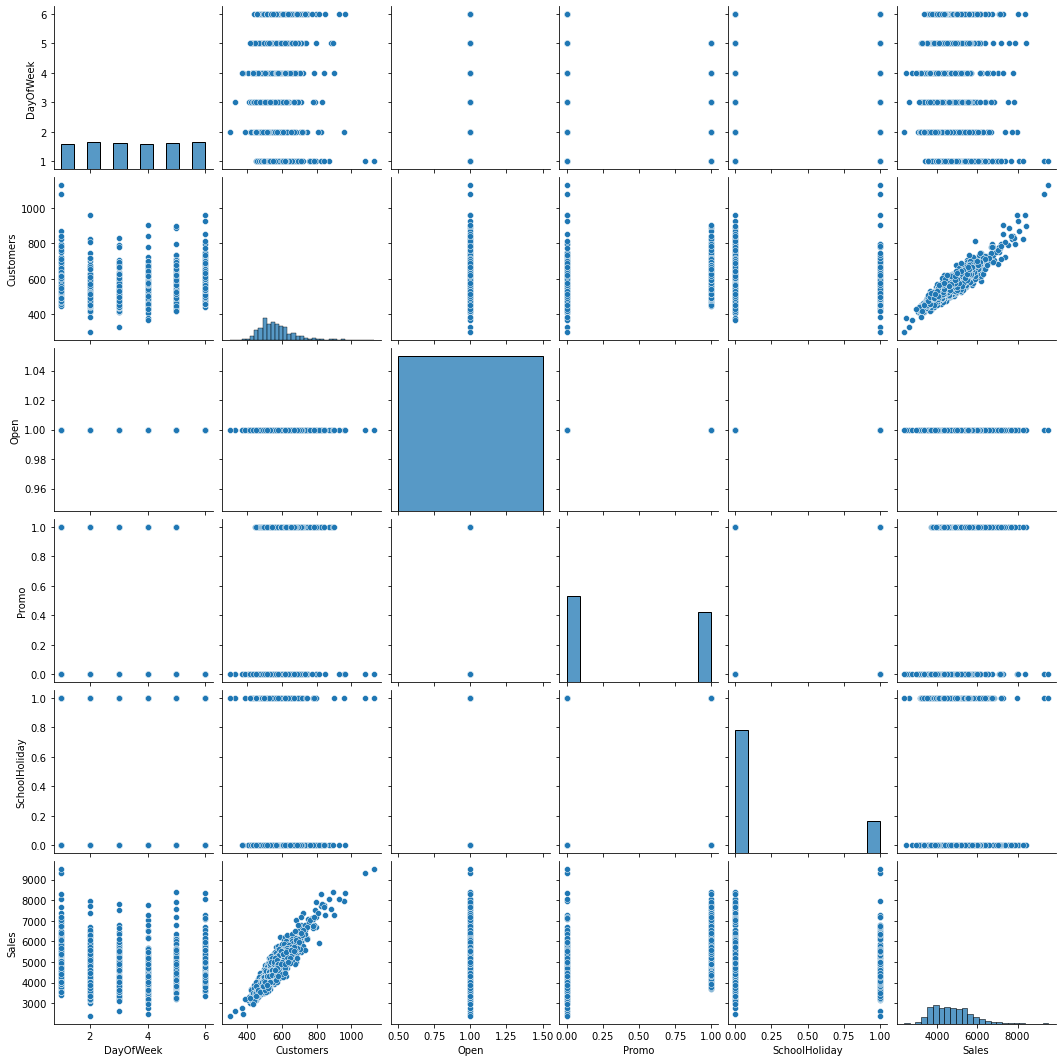

In [39]:
sns.pairplot(first_store_open[['DayOfWeek',  'Customers', 'Open', 'Promo', 'SchoolHoliday', 'Sales']])

In [40]:
first_store_open

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month
Date,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,7
2015-07-30,1,4,5020,546,1,1,0,1,7
2015-07-29,1,3,4782,523,1,1,0,1,7
2015-07-28,1,2,5011,560,1,1,0,1,7
2015-07-27,1,1,6102,612,1,1,0,1,7
...,...,...,...,...,...,...,...,...,...
2013-01-07,1,1,7176,785,1,1,0,1,1
2013-01-05,1,6,4997,635,1,0,0,1,1
2013-01-04,1,5,4486,619,1,0,0,1,1


In [41]:
first_store_open = first_store_open.asfreq('d')
print(first_store_open.isna().value_counts())
# seasonal_decompose(first_store_open['Sales'])

Store  DayOfWeek  Sales  Customers  Open   Promo  StateHoliday  SchoolHoliday  Month
False  False      False  False      False  False  False         False          False    781
True   True       True   True       True   True   True          True           True     160
dtype: int64


<AxesSubplot:xlabel='Date'>

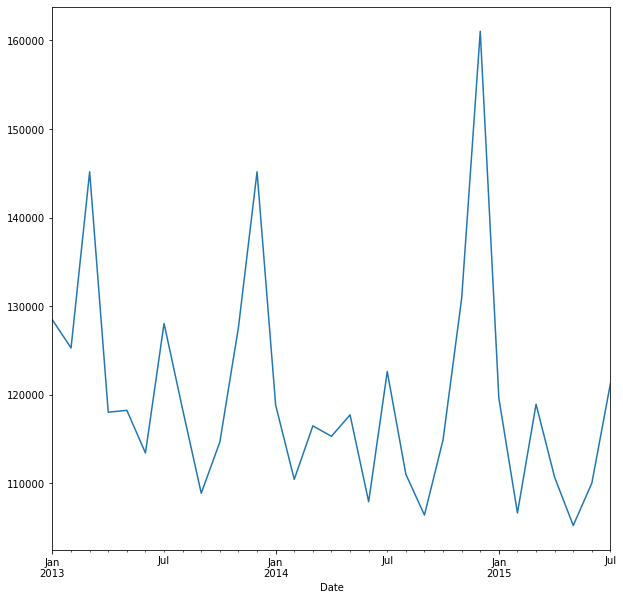

In [42]:
plt.figure(figsize = (10,10))
first_store_open.resample('M')['Sales'].sum().plot()


### Follow up on Dayofweek and Sales 
Checking the correlation between each day and Sales

In [43]:
days_sales_relation = first_store[['DayOfWeek', 'Sales']]

In [44]:

day_ohe = pd.get_dummies(days_sales_relation.DayOfWeek)
day_ohe

,1,2,3,4,5,6,7
Date,,,,,,,
2015-07-31,0,0,0,0,1,0,0
2015-07-30,0,0,0,1,0,0,0
2015-07-29,0,0,1,0,0,0,0
2015-07-28,0,1,0,0,0,0,0
2015-07-27,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2013-01-05,0,0,0,0,0,1,0
2013-01-04,0,0,0,0,1,0,0
2013-01-03,0,0,0,1,0,0,0


In [45]:
day_ohe['Sales'] = days_sales_relation['Sales']
day_ohe

,1,2,3,4,5,6,7,Sales
Date,,,,,,,,
2015-07-31,0,0,0,0,1,0,0,5263
2015-07-30,0,0,0,1,0,0,0,5020
2015-07-29,0,0,1,0,0,0,0,4782
2015-07-28,0,1,0,0,0,0,0,5011
2015-07-27,1,0,0,0,0,0,0,6102
...,...,...,...,...,...,...,...,...
2013-01-05,0,0,0,0,0,1,0,4997
2013-01-04,0,0,0,0,1,0,0,4486
2013-01-03,0,0,0,1,0,0,0,4327


In [46]:
day_sale_corr = day_ohe.corr()
day_sale_corr

,1,2,3,4,5,6,7,Sales
1,1.000000,-0.166562,-0.166562,-0.166562,-0.166562,-0.165842,-0.165842,0.202252
2,-0.166562,1.000000,-0.167286,-0.167286,-0.167286,-0.166562,-0.166562,0.143191
3,-0.166562,-0.167286,1.000000,-0.167286,-0.167286,-0.166562,-0.166562,0.103304
4,-0.166562,-0.167286,-0.167286,1.000000,-0.167286,-0.166562,-0.166562,0.030234
5,-0.166562,-0.167286,-0.167286,-0.167286,1.000000,-0.166562,-0.166562,0.115881
6,-0.165842,-0.166562,-0.166562,-0.166562,-0.166562,1.000000,-0.165842,0.201615
7,-0.165842,-0.166562,-0.166562,-0.166562,-0.166562,-0.165842,1.000000,-0.797695
Sales,0.202252,0.143191,0.103304,0.030234,0.115881,0.201615,-0.797695,1.000000


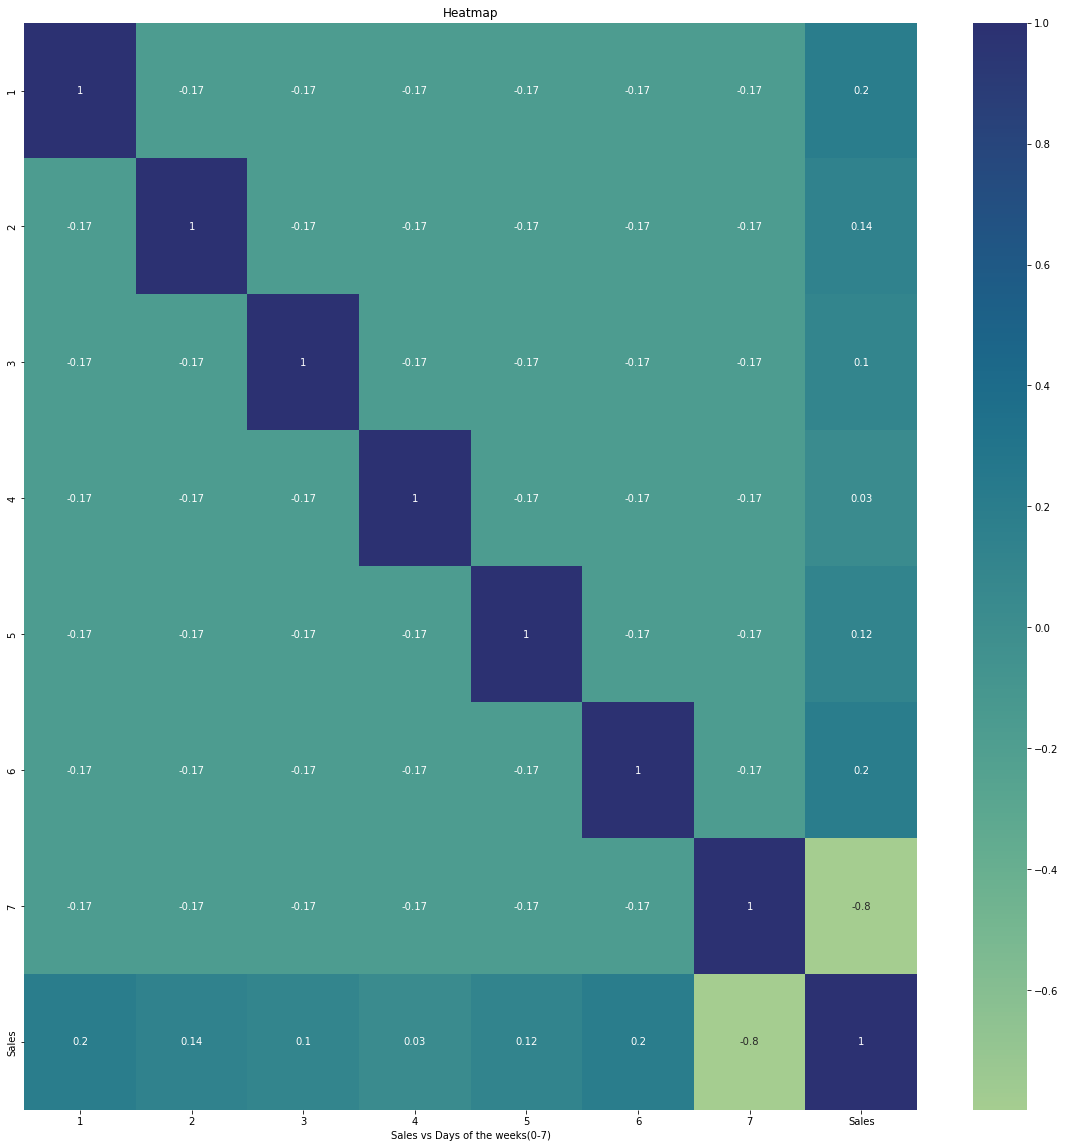

In [47]:
plt.figure(figsize = (20,20))
sns.heatmap(day_sale_corr,cmap="crest", annot = True)
plt.xlabel("Sales vs Days of the weeks(0-7)")
plt.title("Heatmap")
plt.show()

### ACF and PACF plots

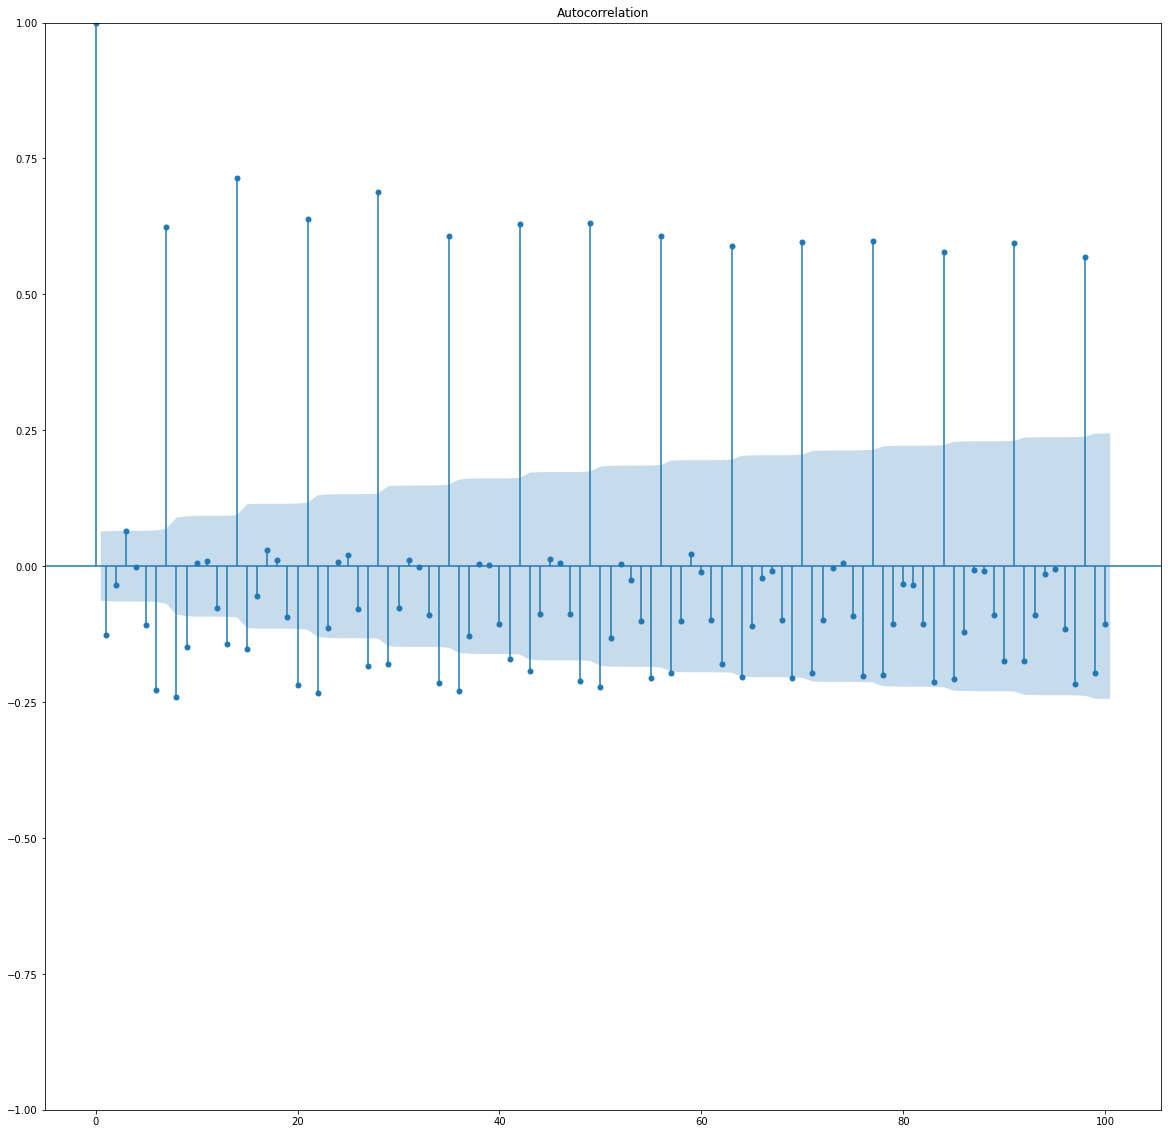

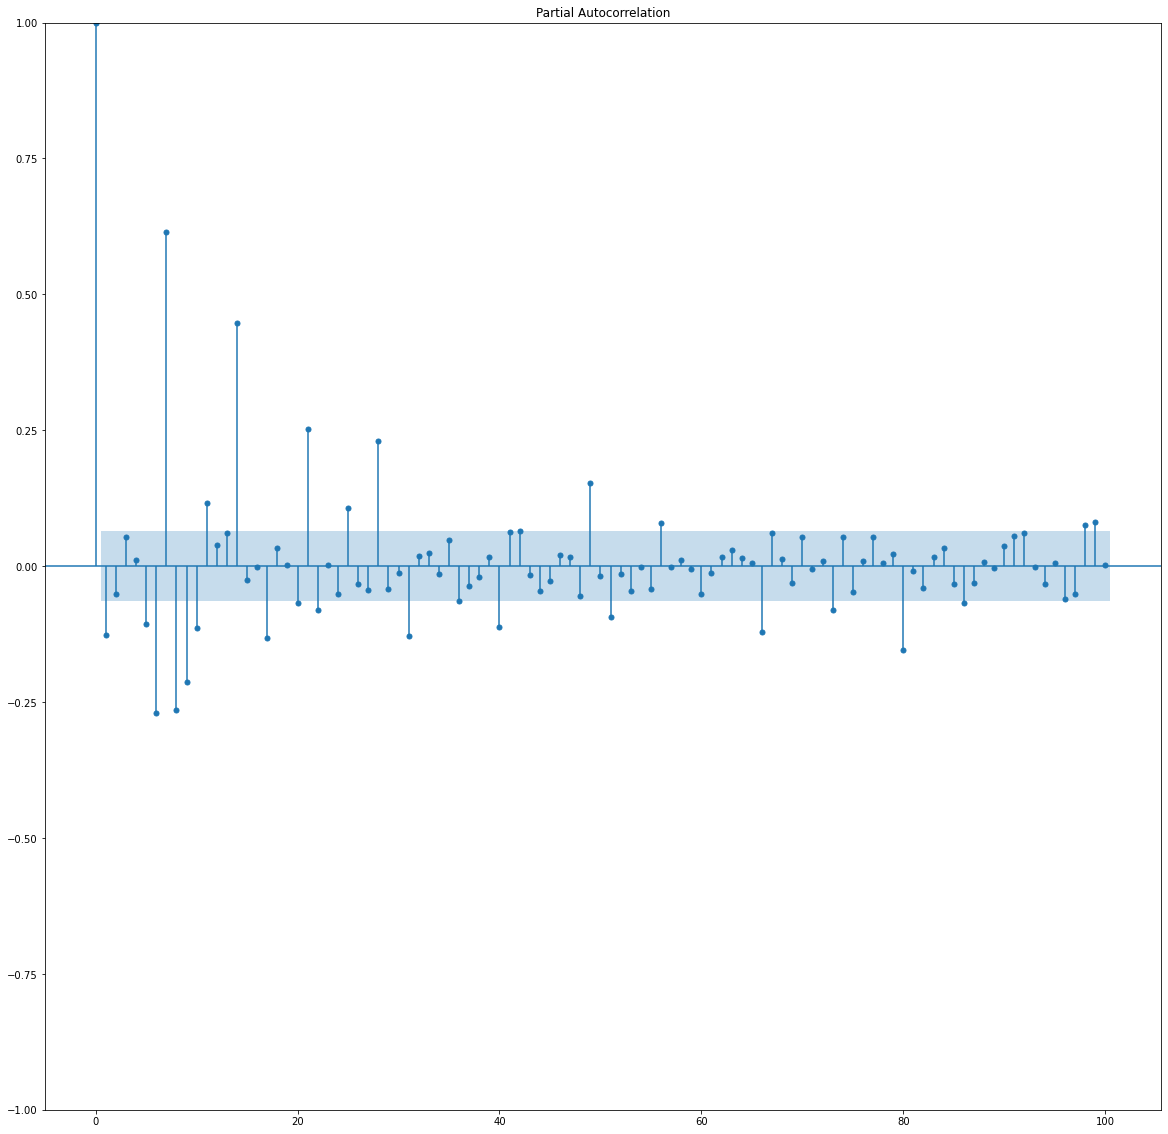

In [48]:
plt.rc("figure", figsize=(20,20))
plot_acf(first_store['Sales'], lags = 100)
plot_pacf(first_store['Sales'], lags = 100);

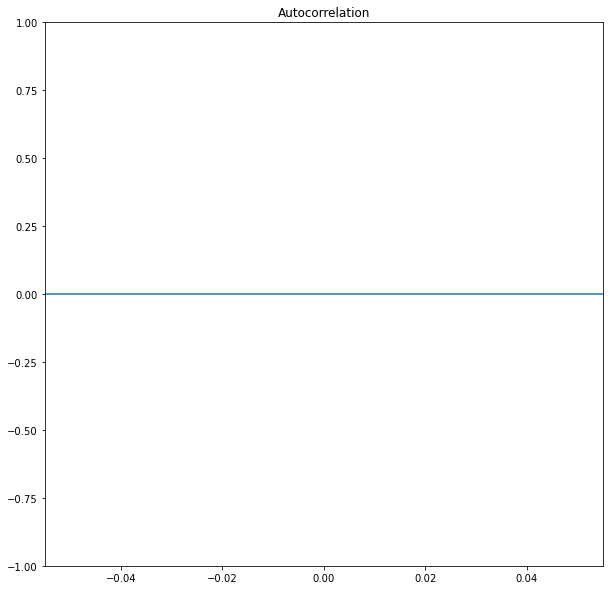

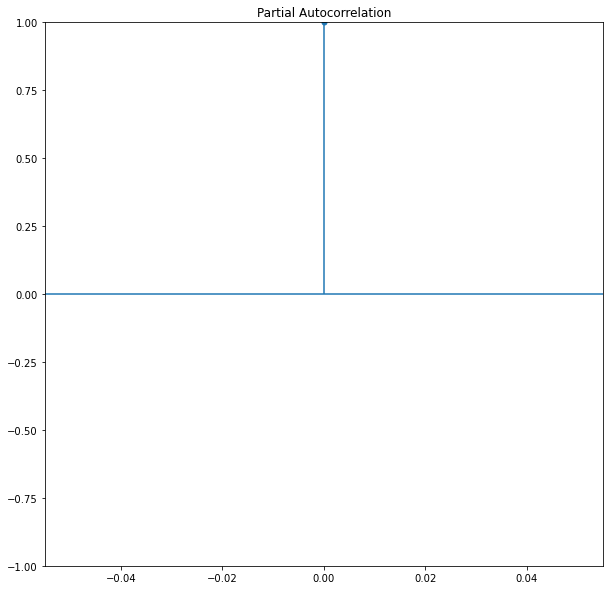

In [49]:
plt.rc("figure", figsize=(10,10))
plot_acf(first_store_open['Sales'], lags = 100)
plot_pacf(first_store_open['Sales'], lags = 100);

In [50]:
# first_store['shifted_7'] = first_store['Sales'].shift(7).fillna(0)
# first_store

In [51]:
# first_store['diff_7'] = first_store['Sales']-first_store['shifted_7']

In [52]:
# plot_acf(first_store['diff_7'], lags = 100)